In [1]:
import matplotlib
%matplotlib inline
import sys
from __future__ import division
from collections import defaultdict
from pylab import *
from itertools import izip
import colorbrewer as cb
import os
from scripts import utils as sutils
import cPickle as pickle
import colorbrewer as cb
from matplotlib import pyplot as plt
import pandas as pnd

In [2]:
PLOTPATH = 'plots/fig3/'

In [3]:
data_anno = pnd.read_csv('../data/fig3/ratios_anno.txt', sep='\t')
data_rna = pnd.read_csv('../data/fig3/ratios_rna.txt', sep='\t')

#####Breakdown of LSV total numbers - RNA + annotation

In [4]:
names_rna = ['Lizard', 'Chicken', 'Opossum', 'ensembl_mouse', 'ensembl_mouse_12tis8rep', 'Chimp', 'ensembl_human', 'refseq_mouse', 'refseq_human']
data_rna_sorted = data_rna.reindex([list(data_rna.species).index(a) for a in names_rna]).iloc[:-2, :]
data_rna.reindex([list(data_rna.species).index(a) for a in names_rna])

,species,num_lsvs,num_complex,ratio_complex,exonic_classical,exonic_non-classical_binary,exonic_non-classical_complex,intronic-classical_binary,intronic_non-classical_binary,intronic_non-classical_complex
3,Lizard,12686,2488,19.61,5579,3796,2296,689,134,192
0,Chicken,19457,3104,15.95,9598,4670,2596,1926,159,508
2,Opossum,10618,1033,9.73,6060,2744,955,745,36,78
6,ensembl_mouse,53115,14497,27.29,18075,13867,11663,4605,2071,2834
8,ensembl_mouse_12tis8rep,99063,30674,30.96,20619,13996,12689,23845,9929,17985
1,Chimp,12199,1398,11.46,8024,2147,1260,578,52,138
4,ensembl_human,80167,29716,37.07,16076,31278,28178,1359,1738,1538
7,refseq_mouse,37835,8685,22.95,18233,5142,6584,5555,220,2101
5,refseq_human,55709,16451,29.53,18429,19702,15723,907,220,728


#####Breakdown of LSV total numbers - Only annotation

In [5]:
names_anno = ['Lizard', 'Chicken', 'Opossum', 'ensembl_Mouse', 'ensembl_Mouse', 'Chimp', 'ensembl_Human', 'refseq_Mouse', 'refseq_Human']
data_anno_sorted = data_anno.reindex([list(data_anno.species).index(a) for a in names_anno]).iloc[:-2, :]
data_anno.reindex([list(data_anno.species).index(a) for a in names_anno])

,species,num_lsvs,num_complex,ratio_complex,exonic_classical,exonic_non-classical_binary,exonic_non-classical_complex,intronic-classical_binary,intronic_non-classical_binary,intronic_non-classical_complex
3,Lizard,803,0,0.00,380,263,0,160,0,0
0,Chicken,1510,43,2.85,833,309,43,320,5,0
2,Opossum,2032,30,1.48,793,785,30,424,0,0
6,ensembl_Mouse,48372,10275,21.24,18172,12702,8339,5365,1858,1936
6,ensembl_Mouse,48372,10275,21.24,18172,12702,8339,5365,1858,1936
1,Chimp,1814,51,2.81,948,334,49,471,10,2
4,ensembl_Human,98994,27062,27.34,30849,28838,23516,8348,3897,3546
7,refseq_Mouse,11115,1640,14.75,7542,1283,1476,636,14,164
5,refseq_Human,28251,5444,19.27,18365,2869,5005,1508,65,439


### Figure 3A (top)

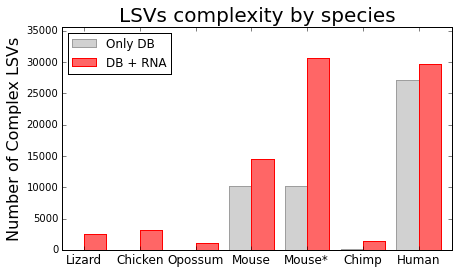

In [6]:
fig, ax1 = plt.subplots(figsize=[7, 4])

color_ns = '#9e9e9e' #'#%02x%02x%02x' % cb.Greys[6][1]
color_ns_rna = '#FF0000'#'#%02x%02x%02x' % cb.Greys[6][3]

names_anno = ['Lizard', 'Chicken', 'Opossum', 'Mouse', 'Mouse*', 'Chimp', 'Human']

anno_rna_ns   = data_rna_sorted.num_complex
anno_ns   = data_anno_sorted.num_complex

ind = np.arange(len(anno_ns))    # the x locations for the groups
width = .4       # the width of the bars: can also be len(x) sequence

p1 = ax1.bar(ind, anno_ns, width, color='#D1D1D1', edgecolor=color_ns, linewidth=1) # , edgecolor = "none"
p2 = ax1.bar(ind+width, anno_rna_ns,  width, color='#FF6666', edgecolor=color_ns_rna, linewidth=1)

ax1.set_ylabel('Number of Complex LSVs', size=16)
ax1.set_ylim(0, max(anno_rna_ns)+5000)
plt.title('LSVs complexity by species', size=20)
plt.xticks(ind+width, names_anno, size=12)
plt.legend( (p1[0], p2[0]), ('Only DB', 'DB + RNA'), loc=2)

# plt.savefig("%s/figure3A_top.pdf"% PLOTPATH, width=300, height=300, dpi=200)
# plt.clf()
plt.show()

### Figure 3A (bottom)

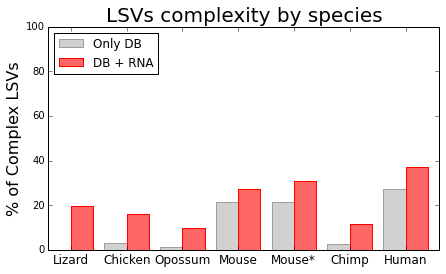

In [7]:
fig, ax1 = plt.subplots(figsize=[7, 4])

color_perc = '#9e9e9e' #'#%02x%02x%02x' % cb.Greys[6][1]
color_perc_rna = '#ff0000'#'#%02x%02x%02x' % cb.Greys[6][3]

names_anno_rna = ['Lizard', 'Chicken', 'Opossum', 'Mouse', 'Mouse*', 'Chimp',  'Human']
anno_rna_perc = data_rna_sorted.num_complex/data_rna_sorted.num_lsvs*100
anno_perc = data_anno_sorted.num_complex/data_anno_sorted.num_lsvs*100

ind = np.arange(len(anno_rna_perc))    # the x locations for the groups
width = .4       # the width of the bars: can also be len(x) sequence

p1 = ax1.bar(ind, anno_perc, width, color='#D1D1D1', edgecolor=color_perc, linewidth=1)
p2 = ax1.bar(ind+width, anno_rna_perc,  width, color='#FF6666', edgecolor=color_perc_rna, linewidth=1)

ax1.set_ylabel('% of Complex LSVs', size=16)
ax1.set_ylim(0,100)
plt.title('LSVs complexity by species', size=20)
plt.xticks(ind+width, names_anno_rna, size=12)
plt.legend( (p1[0], p2[0]), ('Only DB', 'DB + RNA'), loc=2 )

# plt.savefig("%s/figure3A_bottom.pdf"% PLOTPATH, width=300, height=300, dpi=200)
# plt.clf()
plt.show()

### Figure 3B (top)

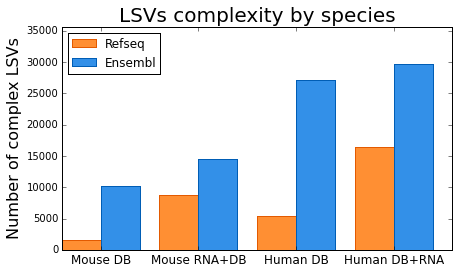

In [8]:
fig, ax1 = plt.subplots(figsize=[7, 4])

color_refseq = '#E35A00' #'#%02x%02x%02x' % cb.Greys[6][1]
color_ensembl = '#005DB5'#'#%02x%02x%02x' % cb.Greys[6][3]

names = ['Mouse DB', 'Mouse RNA+DB', 'Human DB', 'Human DB+RNA']
data_ensembl = [data_anno[data_anno.species == 'ensembl_Mouse'].iloc[0],
              data_rna[data_rna.species == 'ensembl_mouse'].iloc[0],
              data_anno[data_anno.species == 'ensembl_Human'].iloc[0],
              data_rna[data_rna.species == 'ensembl_human'].iloc[0]
             ]
data_refseq = [
    data_anno[data_anno.species == 'refseq_Mouse'].iloc[0],
    data_rna[data_rna.species == 'refseq_mouse'].iloc[0],
    data_anno[data_anno.species == 'refseq_Human'].iloc[0],
    data_rna[data_rna.species == 'refseq_human'].iloc[0]
]

ns_ensembl = [aa['num_complex'] for aa in data_ensembl]
ns_refseq = [aa['num_complex'] for aa in data_refseq]

ind = np.arange(len(names))    # the x locations for the groups
width = .4       # the width of the bars: can also be len(x) sequence

p1 = ax1.bar(ind, ns_refseq, width, color='#FF8F33', edgecolor=color_refseq, linewidth=1)
p2 = ax1.bar(ind+width, ns_ensembl,  width, color='#3390E8', edgecolor=color_ensembl, linewidth=1)

ax1.set_ylabel('Number of complex LSVs', size=16)
ax1.set_ylim(0,max(anno_rna_ns)+5000)
plt.title('LSVs complexity by species', size=20)
plt.xticks(ind+width, names, size=12)
plt.legend( (p1[0], p2[0]), ('Refseq', 'Ensembl'), loc=2 )

# plt.savefig("%s/figure3B_top.pdf"% PLOTPATH, width=300, height=300, dpi=200)
# plt.clf()
plt.show()

### Figure 3B (bottom)

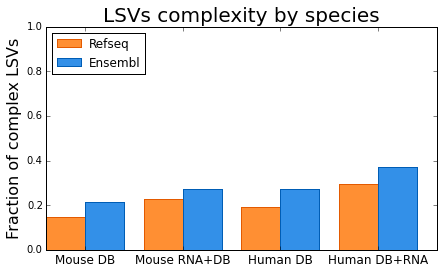

In [9]:
fig, ax1 = plt.subplots(figsize=[7, 4])

# color_refseq = '#%02x%02x%02x' % cb.Greys[6][1]
# color_ensembl = '#%02x%02x%02x' % cb.Greys[6][3]

names = ['Mouse DB', 'Mouse RNA+DB', 'Human DB', 'Human DB+RNA']
percs_ensembl = np.array(ns_ensembl)/np.array([aa['num_lsvs'] for aa in data_ensembl])
percs_refseq = np.array(ns_refseq)/np.array([aa['num_lsvs'] for aa in data_refseq])

ind = np.arange(len(names))    # the x locations for the groups
width = .4       # the width of the bars: can also be len(x) sequence

p1 = ax1.bar(ind, percs_refseq, width, color='#FF8F33', edgecolor=color_refseq, linewidth=1)
p2 = ax1.bar(ind+width, percs_ensembl,  width, color='#3390E8', edgecolor=color_ensembl, linewidth=1)

ax1.set_ylabel('Fraction of complex LSVs', size=16)
plt.title('LSVs complexity by species', size=20)
plt.ylim([0,1])
plt.xticks(ind+width, names, size=12)
plt.legend( (p1[0], p2[0]), ('Refseq', 'Ensembl'), loc=2 )

# plt.savefig("%s/figure3B_bottom.pdf"% PLOTPATH, width=300, height=300, dpi=200)
# plt.clf()
plt.show()